## Step -1 Business Problem Understanding
- Previously, we explored is there a relationship between total advertising spend and sales? as well as predicting the total sales for some value of total spend
- **what is the relationship between each advertising channel (TV, Radio, Newspaper) and sales**

## Step -2 Data Understanding

#### Load Data & understand every variables

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Advertising.csv')
df.head()

TV  radio  newspaper  sales
0  230100  37800      69200  22100
1   44500  39300      45100  10400
2   17200  45900      69300   9300
3  151500  41300      58500  18500
4  180800  10800      58400  12900

#### Dataset Understanding

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   TV         200 non-null    int64
 1   radio      200 non-null    int64
 2   newspaper  200 non-null    int64
 3   sales      200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


#### Exploratory Data Analysis

In [5]:
df.describe()

TV         radio      newspaper         sales
count     200.000000    200.000000     200.000000    200.000000
mean   147042.500000  23264.000000   30554.000000  14022.500000
std     85854.236315  14846.809176   21778.620839   5217.456566
min       700.000000      0.000000     300.000000   1600.000000
25%     74375.000000   9975.000000   12750.000000  10375.000000
50%    149750.000000  22900.000000   25750.000000  12900.000000
75%    218825.000000  36525.000000   45100.000000  17400.000000
max    296400.000000  49600.000000  114000.000000  27000.000000

<Figure size 400x300 with 0 Axes>

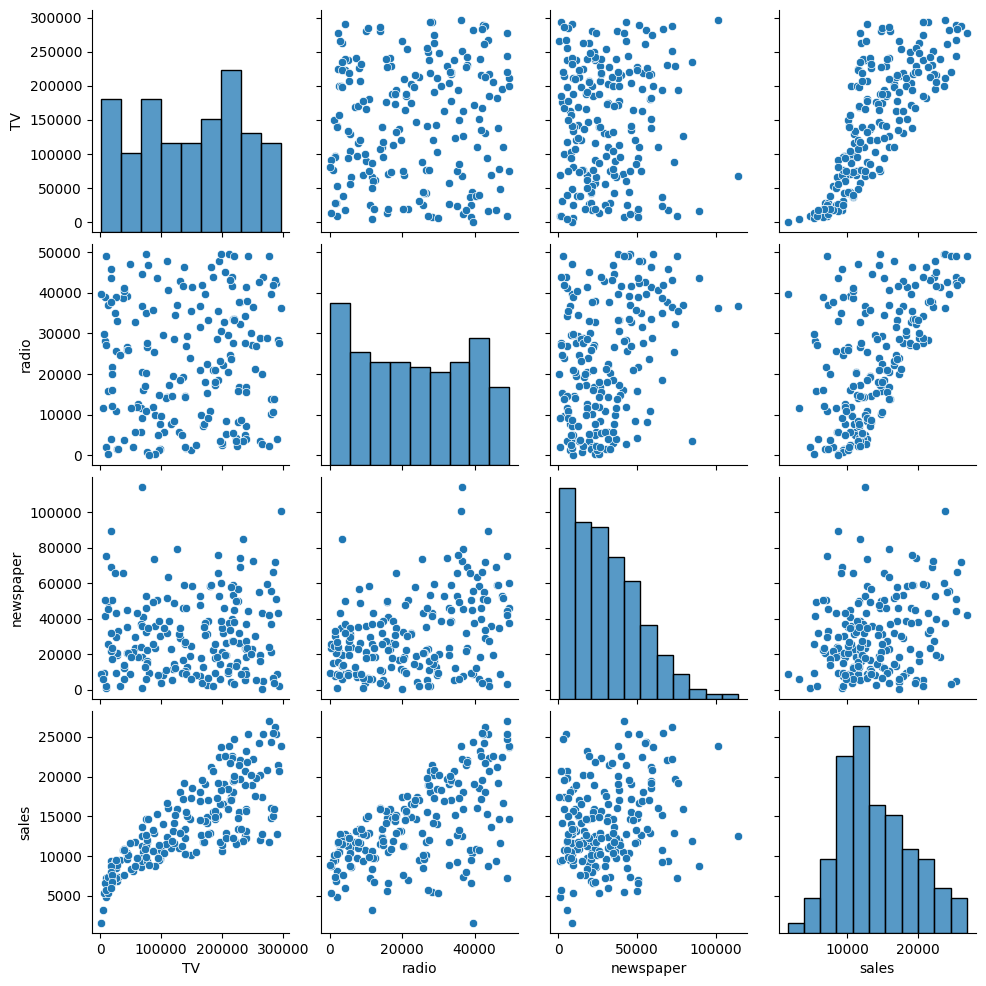

In [6]:
plt.figure(figsize=(4, 3))
sns.pairplot(df)
plt.show()

In [7]:
df.corr()

TV     radio  newspaper     sales
TV         1.000000  0.054809   0.056648  0.782224
radio      0.054809  1.000000   0.354104  0.576223
newspaper  0.056648  0.354104   1.000000  0.228299
sales      0.782224  0.576223   0.228299  1.000000

from the above code, we can clearly see 
- **Tv and radio** having 0.055 correlation
- **Tv and np** having 0.057 correlation
- **radio and np** having 0.35 correlation

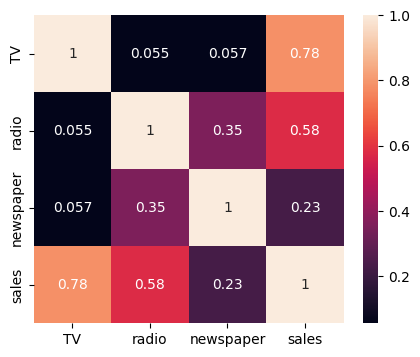

In [8]:
plt.figure(figsize=(5, 4))
sns.heatmap(df.corr(), annot=True)
plt.show()

- The relation between y and x should be high. The higher the value the stronger the correlation, better accuracy
- The relation between any two independent variables should be low.

**If the correlation between any 2 independent variables is >= 0.5, then it is called as colinearity problem**

In [9]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [10]:
df[['TV', 'radio', 'newspaper']].skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
dtype: float64

all three columns are normally distributed

## Step - 3: Data Preprocessing

#### Data Cleaning

In [11]:
# for this dataset, no data cleaning is required

#### Data Wrangling

In [12]:
# for this dataset, no encoding required

#### X & y

In [13]:
X = df[['TV', 'radio', 'newspaper']]
y = df['sales']

rather than to select all input variables separately, we drop drop our output variable and this way, we will get our all input variable

In [14]:
X = df.drop(columns='sales')
y = df['sales']

## Step - 4: Modeling

### findout the best random_state value 

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

Train = []
Test = []
CV = []

for i in range(0, 100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    model = LinearRegression()
    model.fit(X_train, y_train)

    ypred_train = model.predict(X_train)
    ypred_test = model.predict(X_test)

    Train.append(model.score(X_train, y_train))
    # print('Train R2:', r2_score(y_train, ypred_train))
    Test.append(model.score(X_test, y_test))
    # print('Test R2:', r2_score(y_test, ypred_test))

    CV.append(cross_val_score(model, X_train, y_train, cv=5).mean())


em = pd.DataFrame({'Train':Train, 'Test':Test, 'CV':CV})
gm = em[(abs(em['Train']-em['Test']) <= 0.05) & (abs(em['Test']-em['CV']) <=0.05)]
print('best random state number:', gm[gm['Test']==gm['Test'].max()].index.to_list())

best random state number: [99]


In [16]:
# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

# <font color = aqua> MLR </font> 

### Build a model

In [17]:
# Modelling
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

# prediction
ypred_train = model.predict(X_train)
ypred_test = model.predict(X_test)

from sklearn.metrics import r2_score
print('Train R2:', r2_score(y_train, ypred_train))
# Cross Validation on train data
from sklearn.model_selection import cross_val_score
print('Cross Validation Score:', cross_val_score(model, X_train, y_train, cv=5).mean())
print('Test R2:', r2_score(y_test, ypred_test))

Intercept: 2904.4859140769295
Coefficients: [0.04550574 0.18820547 0.00075244]
Train R2: 0.8906288862925659
Cross Validation Score: 0.8745389851558864
Test R2: 0.9200846680148507


#### Checklist 4: (only for linear Regression) : Check for Assumptions

#### 1. Linearity of Errors

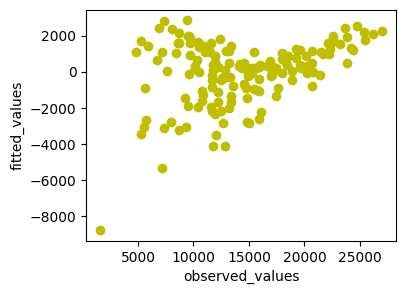

In [18]:
train_error = y_train - ypred_train
plt.figure(figsize=(4, 3))
plt.scatter(y_train, train_error, c='y')
plt.xlabel('observed_values')
plt.ylabel('fitted_values')
plt.show()

#### 2. Normality of Errors

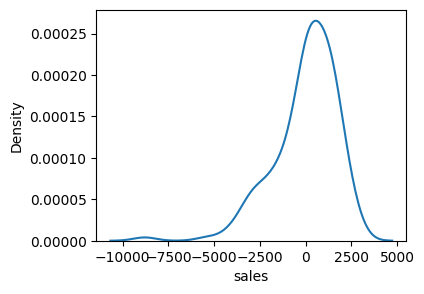

In [19]:
plt.figure(figsize=(4, 3))
sns.kdeplot(train_error)
plt.show()

#### 3. Equal Variance of Errors (Homoscadesicity)

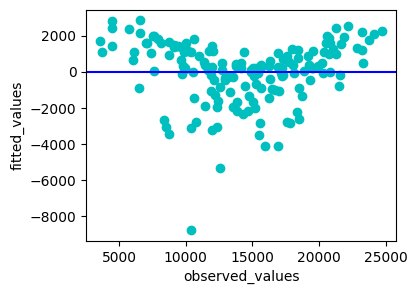

In [20]:
train_error = y_train - ypred_train
plt.figure(figsize=(4, 3))
plt.scatter(ypred_train, train_error, c='c')
plt.axhline(y=0, color='blue')
plt.xlabel('observed_values')
plt.ylabel('fitted_values')
plt.show()

#### 4. Variable Significance

#### Hypothesis Testing for variables

- **null Hypothesis:** There is no relationship between input variable and output variable (and thus B1 equals zero)
- **alternative hypothesis:** This is a relationship between input variable and output variable (and thus B1 is not equal to zero)

In [21]:
import statsmodels.formula.api as smf
model1 = smf.ols('y_train ~ X_train', data=X_train).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_train   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     423.4
Date:                Tue, 06 Feb 2024   Prob (F-statistic):           1.02e-74
Time:                        16:56:46   Log-Likelihood:                -1419.4
No. Observations:                 160   AIC:                             2847.
Df Residuals:                     156   BIC:                             2859.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2904.4859    368.721      7.877      0.000    2176.156    3632.816
X_train[0]     0.0455      0.002     28.499      0.000       0.042       0.049
X_train[1]     0.1882      0.010     18.941      0.000       0.169       0.208
X_train[2]     0.0008      0.007      0.114      0.909      -0.012       0.014
==============================================================================
Omnibus:                       53.148   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.731
Skew:                          -1.386   Prob(JB):                     5.54e-30
Kurtosis:                       6.539   Cond. No.                     4.75e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.75e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

>>

- from sklearn.model_selection import train_test_split
- df_train, df_test = train_test_split(df, train_size=0.8, random_state=99)

- import statsmodels.formula.api as smf
- model1 = smf.ols('y_train~X_train', data=df_train).fit()
- model1.summary()
>>

### Added variable plot (AV plot)
- partial differentiation instead of normal differentiation

In [22]:
model

LinearRegression()

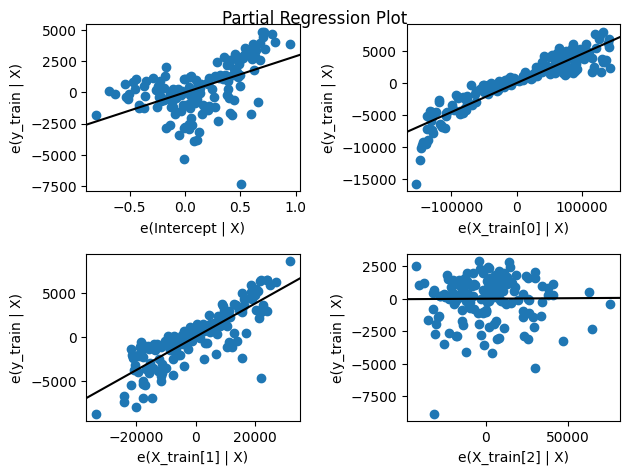

In [23]:
import statsmodels.api as sm
sm.graphics.plot_partregress_grid(model1)
plt.show()

- added variable plot is not showing any significance for newspaper

### Final model including TV and radio only 

In [24]:
X = X.drop(columns=['newspaper'])

In [25]:
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()
model2.fit(X_train, y_train)

print('Intercept:', model2.intercept_)
print('Coefficients:', model2.coef_)

ypred_train = model2.predict(X_train)
from sklearn.metrics import r2_score
print('Train R2:', r2_score(y_train, ypred_train))
print('Cross Validation Score:', cross_val_score(model2, X_train, y_train, cv=5).mean())

ypred_test = model2.predict(X_test)
print('Test R2:', r2_score(y_test, ypred_test))

Intercept: 2904.4859140769295
Coefficients: [0.04550574 0.18820547 0.00075244]
Train R2: 0.8906288862925659
Cross Validation Score: 0.8745389851558864
Test R2: 0.9200846680148507


here as we can see after removing unimportant column our reqirement is not satistifed because in Train R2 and Test R2 both have huge difference.

as we know when Test R2 and Train R2 is not same so in that case we use Regularization algorithm but before use this algorithm, we need to try all possible like try to remove duplicates, outliers, missing values, etc.

and if after using everything, we are not getting our answer so that means, we need to change our algorithm from linear regression.

>

when we performed data preprocessing, we saw there was some outliers so we can try to remove those outliers and again we can create new model for prediction and can check our Train R2 and Test R2.
- remove outliers & check accuracy
- decrease skewness
- use different algorithm (means if linear regression is not lit)

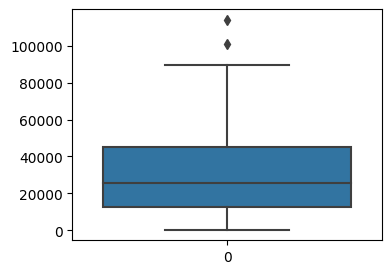

In [26]:
plt.figure(figsize=(4, 3))
sns.boxplot(df['newspaper'])
plt.show()

In [27]:
# Calculate Q1
Q1 = df['newspaper'].quantile(0.25)
print('Q1:', Q1)

# Calculate Q3
Q3 = df['newspaper'].quantile(0.75)
print('Q1:', Q3)

# Calculate IQR
IQR = Q3 - Q1
print(IQR)

# Calculate lower limit of outliers
lower_limit = Q1 - (IQR * 1.5)
print(lower_limit)

# Calculate upper limit of outliers
upper_limit = Q3 + (IQR * 1.5)
print(upper_limit)

Q1: 12750.0
Q1: 45100.0
32350.0
-35775.0
93625.0


In [28]:
df[(df['newspaper'] < lower_limit) | (df['newspaper'] > upper_limit)]

TV  radio  newspaper  sales
16    67800  36600     114000  12500
101  296400  36300     100900  23800

In [32]:
import statsmodels.formula.api as smf
model2 = smf.ols('y_train ~ X_train', data=X_train).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_train   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     423.4
Date:                Tue, 06 Feb 2024   Prob (F-statistic):           1.02e-74
Time:                        16:59:46   Log-Likelihood:                -1419.4
No. Observations:                 160   AIC:                             2847.
Df Residuals:                     156   BIC:                             2859.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2904.4859    368.721      7.877      0.000    2176.156    3632.816
X_train[0]     0.0455      0.002     28.499      0.000       0.042       0.049
X_train[1]     0.1882      0.010     18.941      0.000       0.169       0.208
X_train[2]     0.0008      0.007      0.114      0.909      -0.012       0.014
==============================================================================
Omnibus:                       53.148   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.731
Skew:                          -1.386   Prob(JB):                     5.54e-30
Kurtosis:                       6.539   Cond. No.                     4.75e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.75e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

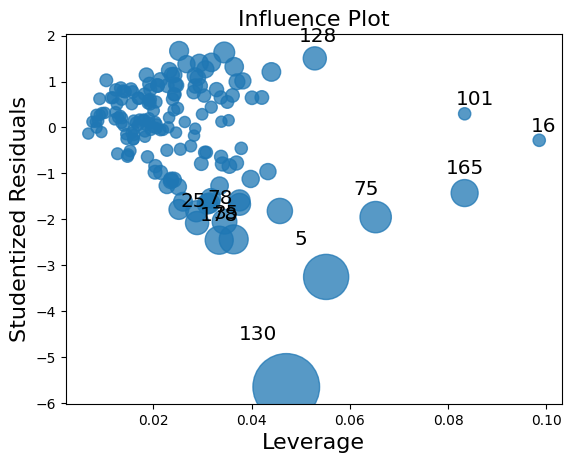

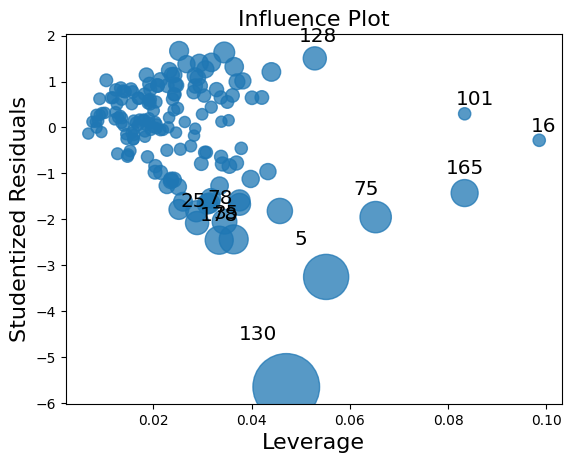

In [33]:
import statsmodels.api as sm
sm.graphics.influence_plot(model2)

In [ ]:
# drop the influential records
df.drop(index=[5, 130], inplace=True)

In [ ]:
df.shape

previsouly, we had 200 records now after removing outliers we have 198 records

In [ ]:
X = df.drop(columns=['sales', 'newspaper'])
y = df['sales']

In [ ]:
X.head()

In [ ]:
y.head()

In [ ]:
X.shape
y.shape

In [ ]:
from sklearn.linear_model import LinearRegression
model3 = LinearRegression()
model3.fit(X_train, y_train)

print('Intercept:', model3.intercept_)
print('Coefficients:', model3.coef_)

ypred_train = model3.predict(X_train)
from sklearn.metrics import r2_score
print('Train R2:', r2_score(y_train, ypred_train))
print('Cross Validation Score:', cross_val_score(model3, X_train, y_train, cv=5).mean())

ypred_test = model3.predict(X_test)
print('Test R2:', r2_score(y_test, ypred_test))

#### Interpreting the coefficients
- Holding all other features fixed, a **1 unit increase in TV Spend** is associated with an **increase of 0.0451 units in sales.**
- This basically means that for every &10000 dollars spend on TV ads, we could expect 451 more units sold.
>
- Holding all other features fixed, a **1 unit increase in radio Spend** is associated with an **increase of 0.1952 units in sales.**
- This basically means that for every &10000 dollars spend on TV ads, we could expect 1952 more units sold.

# Variance Inflation Factor (VIF)
- How much, 1 independent variable impacts other independent variables
- VIF measures the ratio between the variance for a given regression coefficient with only that variable in the model verses the variance for a given regression 

In [ ]:
# calculating the VIF's values of independent variables
rsq_TV = smf.ols('TV~radio+newspaper', data=df).fit().rsquared
vif_TV = 1/(1-rsq_TV)

rsq_radio = smf.ols('radio~TV+newspaper', data=df).fit().rsquared
vif_radio = 1/(1-rsq_radio)

rsq_newspaper = smf.ols('newspaper~radio+TV', data=df).fit().rsquared
vif_newspaper = 1/(1-rsq_newspaper)

# Storing vif values in a data frame
d1 = {'Variables':['TV', 'radio', 'newspaper'], 'VIF':[vif_TV, vif_radio, vif_newspaper]}
Vif_frame = pd.DataFrame(d1)
Vif_frame

In [ ]:
Vif_frame.T

- If the VIF > 4 (threshold value=4)... then there exists a probelm and reinvestiagte the problem
- if VIF >4, for any independent variables, then drop that particular variable

### after good model send the statement and in the statement write down that we need to spend on TV & radio not on newspaper for more sales
>

### Predictions on a new data

In [ ]:
test_df = pd.DataFrame({'TV':[149000], 'radio':[22000], 'newspaper':[12000]})
test_df

In [ ]:
X = test_df.drop(columns=['newspaper'])

In [ ]:
model3.predict(X)